In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../../")
import copy
from steric_free_simulator import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver
import networkx as nx
import torch
from torch import DoubleTensor as Tensor

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x155550ac1828>


In [2]:
base_input = '../../input_files/tetramer_chaperone.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()

['default_assoc', 1.0]
['monomer_add_only', -1.0]
['chaperone', True]
['A']
100.0
['M']
100.0
['B']
100.0
['S']
100.0
['X']
300.0
Parsing rule...
SPLIT_01:  ['A(a)+B(b)', 'A(a!1).B(a!1)']
['A', 'B', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['A(b)+M(a)', 'A(b!1).M(a!1)']
['A', 'M', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['A(c)+S(a)', 'A(c!1).S(a!1)']
['A', 'S', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['B(b)+M(b)', 'B(b!1).M(b!1)']
['B', 'M', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['B(c)+S(b)', 'M(c!1).S(b!1)']
['B', 'S', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['M(c)+S(b)', 'M(c!1).S(b!1)']
['M', 'S', '']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['A(a!1).B(a!1).M(b!1)+X(a)', 'A(a)+B(b)+X(a)+M(b)']
['A(a!1).B(a!1).M(b!1)', 'X(a)']
GGGGGGGGGgg
Parsing rule...
SPLIT_01:  ['A(a!1).B(a!1)+X(a)', 'A(a)+B(b)+X(a)']
['A(a!1).B(a!1)', 'X(a)']
GGGGGGGGGgg
Node-1 :  (0, {'struct': <networkx.classes.graph.Graph object at 0x1554bb6df080>, 'copies': tensor([100.], dtype=torch.float64), 

Node-1 :  (4, {'struct': <networkx.classes.graph.Graph object at 0x155550064550>, 'copies': tensor([300.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (14, {'struct': <networkx.classes.graph.Graph object at 0x1554bb540400>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
-----
{'X'}
{'S', 'M', 'B'}
{'X'}
False
Orig edges:  []
Nextn edges:  [('B', 'M'), ('B', 'S'), ('M', 'S')]
Item edges:  [('B', 'M'), ('B', 'S'), ('M', 'S')]
Allowed edges: 
('A', 'B')
[False, True]
False
Allowed edges: 
('A', 'M')
[False, True]
False
Allowed edges: 
('A', 'S')
[False, True]
False
Allowed edges: 
('B', 'M')
[True, True]
True
Allowed edges: 
('B', 'S')
[True, True]
True
Allowed edges: 
('M', 'S')
[True, True]
True
Allowed edges: 
('ABM', 'X')
[False, True]
False
Allowed edges: 
('AB', 'X')
[False, True]
False
Node-1 :  (4, {'struct': <networkx.classes.graph.Graph object at 0x155550064550>, 'copies': tensor([300.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (15, {'struct': <networkx.

Node-2 :  (6, {'struct': <networkx.classes.graph.Graph object at 0x1554bb51b710>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'S', 'A', 'M'}
{'A', 'B'}
{'S', 'M'}
Steric hindrance detected
Node-1 :  (11, {'struct': <networkx.classes.graph.Graph object at 0x1554bb51b748>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (7, {'struct': <networkx.classes.graph.Graph object at 0x1555500647b8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'S', 'A', 'M'}
{'A', 'S'}
{'M'}
Steric hindrance detected
Node-1 :  (11, {'struct': <networkx.classes.graph.Graph object at 0x1554bb51b748>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (8, {'struct': <networkx.classes.graph.Graph object at 0x1554bb540978>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'S', 'A', 'M'}
{'M', 'B'}
{'A', 'S'}
Steric hindrance detected
Node-1 :  (11, {'struct': <networkx.classes.graph.Graph object at 0x1554bb51b7

{(1, 1): [0, 1, 2, 3, 4, 7], (2, 1): [5, 6, 8, 9, 10, 12, 13, 14, 20, 21, 22, 23], (3, 1): [11, 15, 16, 24, 25], (2, 2): [17, 18, 19]}
{4: [26, 16]}


In [3]:
uid_dict = {}
react_dict = {}
sys.path.append("../../")
nodes_list = []
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    print(n,"--",gtostr(rn.network.nodes[n]['struct']))
    nodes_list.append(gtostr(rn.network.nodes[n]['struct']))
    for r_set in rn.get_reactant_sets(n):
        r_tup = tuple(list(r_set)+[n])
#         print(r_tup)
        data = rn.network.get_edge_data(r_tup[0], n)
        reaction_id = data['uid']
        react_dict[r_tup]=reaction_id
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = ("".join(r1),"".join(r2))
#         print(reactants)
        uid_dict[(n,k)] = uid
#         react_dict[reactants] = uid

print(uid_dict)
print(react_dict)

0 -- A
1 -- M
2 -- B
3 -- S
4 -- X
5 -- AM
6 -- AB
7 -- AS
8 -- BM
9 -- MS
10 -- ABM
11 -- AMS
12 -- BS
13 -- ABS
14 -- BMS
15 -- ABMS
16 -- ABX
17 -- ABMX
{(0, 5): 0, (0, 6): 1, (0, 7): 2, (0, 10): 21, (0, 11): 22, (0, 13): 23, (0, 15): 26, (1, 5): 0, (1, 8): 3, (1, 9): 4, (1, 10): 5, (1, 11): 6, (1, 14): 24, (1, 15): 25, (2, 6): 1, (2, 8): 3, (2, 12): 7, (2, 10): 8, (2, 13): 9, (2, 14): 10, (2, 15): 11, (3, 7): 2, (3, 9): 4, (3, 12): 7, (3, 11): 12, (3, 13): 13, (3, 14): 14, (3, 15): 15, (4, 16): 16, (4, 17): 17, (5, 10): 8, (5, 11): 12, (5, 15): 18, (6, 10): 5, (6, 13): 13, (6, 16): 16, (6, 15): 19, (7, 11): 6, (7, 13): 9, (7, 15): 20, (8, 14): 14, (8, 15): 20, (8, 10): 21, (9, 14): 10, (9, 15): 19, (9, 11): 22, (10, 15): 15, (10, 17): 17, (11, 15): 11, (12, 15): 18, (12, 13): 23, (12, 14): 24, (13, 15): 25, (14, 15): 26, (17, 0): 28, (17, 2): 28, (17, 4): 28, (17, 1): 28}
{(17, 0): 28, (17, 1): 28, (17, 2): 28, (17, 4): 28, (0, 1, 5): 0, (0, 2, 6): 1, (0, 3, 7): 2, (1, 2, 8): 3, (1

In [4]:
print(rn.rxn_class)
print(rn.chap_uid_map)

{(1, 1): [0, 1, 2, 3, 4, 7], (2, 1): [5, 6, 8, 9, 10, 12, 13, 14, 16, 21, 22, 23, 24], (3, 1): [11, 15, 17, 25, 26], (2, 2): [18, 19, 20]}
{4: [28, 17]}


In [5]:
new_kon = torch.zeros([rn._rxn_count], requires_grad=True).double()
#new_kon = [0.2244, 0.2244, 0.2255, 1.6039, 1.6039, 1.6040] # M-1 s-1   
#new_kon = [0.0125, 0.1947, 0.0125, 3.6241, 3.4263, 3.4258] #Max yield Simruntime = 10sec
new_kon = new_kon + Tensor([1.]*np.array(1e0))
new_kon[16] = 1000
new_kon[26] = 3.2



update_kon_dict = {}
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
    update_kon_dict[edge] = new_kon[uid_dict[edge]]

nx.set_edge_attributes(rn.network,update_kon_dict,'k_on')
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))

{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 20}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 21}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 22}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-60.], dtype=torch.float64), 'uid': 25}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 4}
{'k_on

In [6]:
vec_rn = VectorizedRxnNet(rn, dev='cpu',assoc_is_param=False,chap_is_param=True)
vec_rn.reset()
c_scale=1e-1
# print(vec_rn.kon)
runtime= 10
sim = VecSim(vec_rn, runtime, device='cpu')
y = sim.simulate(conc_scale=c_scale,conc_thresh=1e-1,mod_factor=10,mod_bool=True,verbose=True,yield_species=15,store_interval=-1)

A
Reactant Sets:
(16,)
M
Reactant Sets:
(16,)
B
Reactant Sets:
(16,)
S
Reactant Sets:
X
Reactant Sets:
(16,)
AM
Reactant Sets:
(0, 1)
AB
Reactant Sets:
(0, 2)
AS
Reactant Sets:
(0, 3)
BM
Reactant Sets:
(1, 2)
MS
Reactant Sets:
(1, 3)
ABM
Reactant Sets:
(2, 5)
(1, 6)
(8, 0)
AMS
Reactant Sets:
(3, 5)
(0, 9)
(1, 7)
BS
Reactant Sets:
(2, 3)
ABS
Reactant Sets:
(3, 6)
(0, 12)
(2, 7)
BMS
Reactant Sets:
(8, 3)
(9, 2)
(1, 12)
ABMS
Reactant Sets:
(10, 3)
(12, 5)
(8, 7)
(0, 14)
(9, 6)
(1, 13)
(2, 11)
ABMX
Reactant Sets:
(10, 4)
Before:  tensor([[-1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0., -1., -1., -1.,  0.,  0., -1.,  1.,  1.,
          1.,  1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
         -0., -0., -0., -0., -0.,  1.,  1.,  1., -0., -0.,  1., -1.],
        [-1.,  0.,  0., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  1.,  1.,
   

In [7]:
for n in rn.network.nodes():
    print(gtostr(rn.network.nodes[n]['struct']) ,"--","%.4f"%(vec_rn.copies_vec[n].item()))

print(vec_rn.copies_vec)

A -- 0.0000
M -- 0.0000
B -- 0.0000
S -- 0.0000
X -- 0.0000
AM -- 0.0000
AB -- 0.0000
AS -- 0.0000
BM -- 0.0000
MS -- 0.0000
ABM -- 0.0000
AMS -- 0.0000
BS -- 0.0000
ABS -- 0.0000
BMS -- 0.0000
ABMS -- 0.0000
ABMX -- 0.0000
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=torch.float64, grad_fn=<MaxBackward2>)


In [8]:
print(y)

(tensor(0., dtype=torch.float64, grad_fn=<DivBackward0>), tensor(0., dtype=torch.float64, grad_fn=<DivBackward0>), tensor(0., dtype=torch.float64, grad_fn=<DivBackward0>), tensor(8.3347e-08, dtype=torch.float64, grad_fn=<MulBackward0>), tensor(0., dtype=torch.float64, grad_fn=<MulBackward0>), nan, (-1, -1, -1, -1))


<IPython.core.display.Javascript object>


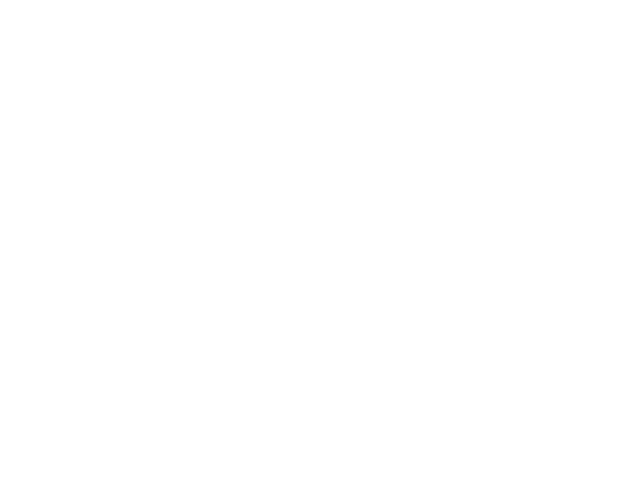

(-15.0, 100)

In [9]:
from matplotlib import pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots()
# nodes_list = ['A','B','M','S','AB','AM','AS','MS','BM','ABM','AMS','ABS','BMS','ABMS']
# nodes_list_repeat = ['A','B','S','AB','AS','AA','BS','ABS','AAB','AAS','AABS']
# nodes_list = ['A','S','M','ABM','ABMS','ABMX']
sim.plot_observable(nodes_list, ax=ax,legend=False,seed=198,lw=5)
# ax.set_title("runtime: " + str(runtime) + " seconds")
handles,labels = ax.get_legend_handles_labels()
ax.set_xscale("log")
fig.legend(handles,nodes_list,loc='upper center',fancybox=True,ncol=6,fontsize='small',markerscale=1.0)
ax.grid(which="major",axis="both")
ax.set_ylim(top=100)

/home/ajhaver4/.conda/envs/steric_free_sim/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/ajhaver4/.conda/envs/steric_free_sim/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/ajhaver4/.conda/envs/steric_free_sim/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


<IPython.core.display.Javascript object>


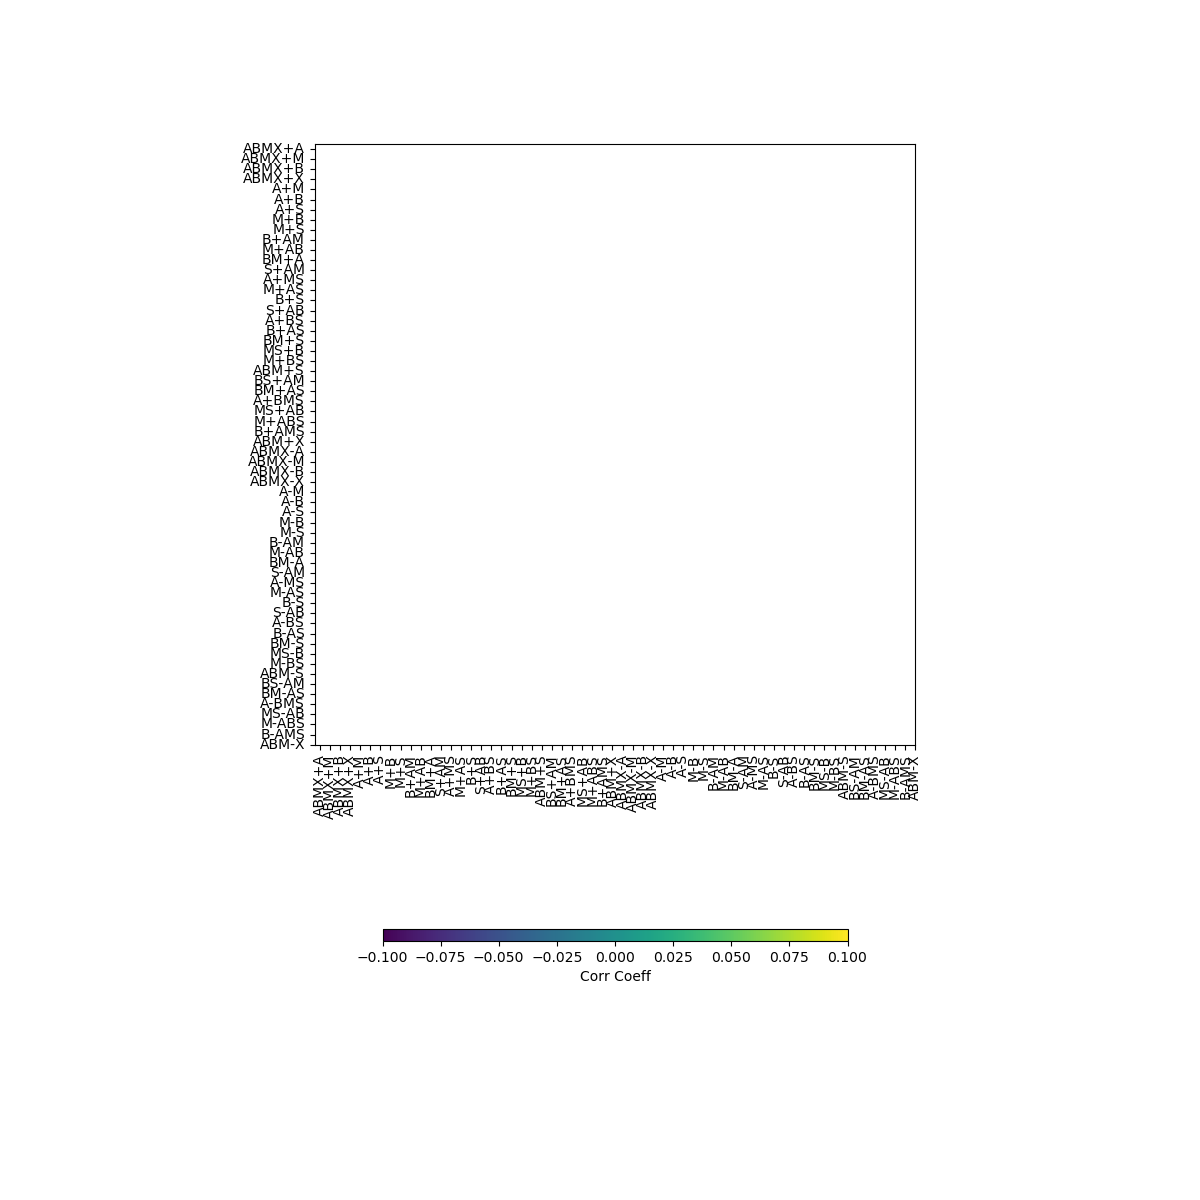

IndexError: index 54 is out of bounds for axis 1 with size 54

In [10]:
#Calculating chemical potential and fluxes
#Calculating correlation b/w fluxes
def corr_matrix(M):
    return(np.corrcoef(M))


flux_corr_matrix = corr_matrix(np.transpose(sim.uid_flux.detach().numpy()))
# print(np.transpose(sim.uid_flux.detach().numpy()))

%matplotlib notebook
fig_c,ax_c = plt.subplots(figsize=(12,12))
hm = ax_c.imshow(flux_corr_matrix)


fw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'+'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
rw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'-'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
ax_labels = fw_labels+rw_labels
ax_c.set_xticks(np.arange(len(ax_labels)))
ax_c.set_yticks(np.arange(len(ax_labels)))
ax_c.set_xticklabels(ax_labels)
ax_c.set_yticklabels(ax_labels)
plt.setp(ax_c.get_xticklabels(),rotation=90, ha='center',fontsize=10,va='top')
plt.setp(ax_c.get_yticklabels(),va='center',fontsize=10)
fig_c.colorbar(hm,ax=ax_c,aspect=40,label="Corr Coeff",orientation='horizontal',panchor=(0.5,0.0),pad=0.2,shrink=0.5)
# ax_c.grid()

for i in range(len(ax_labels)):
    for j in range(len(ax_labels)):
#         print(ax_labels[j],ax_labels[i])
        ax.text(1.0,1.0,flux_corr_matrix[i,j],ha="center", va="center", color="w",transform=ax.transAxes)
fig.tight_layout()
plt.show()
label = "Reaction Fluxes"
ax_c.set_title(label)

In [ ]:
import pickle
import os
pick_path = "./correlation_matrix_reference.pickle"
ref_corr_matrix=np.zeros((2,2))
if os.path.exists(pick_path):
    with open(pick_path,'rb') as pick_handle:
        ref_corr_matrix = pickle.load(pick_handle)
else:
    with open(pick_path,"wb") as pick_handle2:
        pickle.dump(flux_corr_matrix,pick_handle2)

if ref_corr_matrix.all() !=0:
    diff_matrix = flux_corr_matrix-ref_corr_matrix
    fig_diff,ax_diff = plt.subplots(figsize=(12,12))
    hm = ax_diff.imshow(diff_matrix)
    
    fw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'+'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
    rw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'-'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
    ax_labels = fw_labels+rw_labels
    ax_diff.set_xticks(np.arange(len(ax_labels)))
    ax_diff.set_yticks(np.arange(len(ax_labels)))
    ax_diff.set_xticklabels(ax_labels)
    ax_diff.set_yticklabels(ax_labels)
    plt.setp(ax_diff.get_xticklabels(),rotation=90, ha='center',fontsize=10,va='top')
    plt.setp(ax_diff.get_yticklabels(),va='center',fontsize=10)
    fig_diff.colorbar(hm,ax=ax_diff,aspect=40,label="Corr Coeff",orientation='horizontal',panchor=(0.5,0.0),pad=0.2,shrink=0.5)

In [ ]:
flux_data=sim.uid_flux.detach().numpy()[:-1,:]

In [ ]:
#Calculate lag between diff fluxes
from scipy import signal
def calc_lag(x,y):
    corr_array = signal.correlate(x,y,mode='full')
#     lags = signal.correlation_lags(x.size, y.size, mode="full")
#     lag = lags[np.argmax(corr_array)]
#     np_corr_array = np.correlate(x,y,mode='full')
    lag1 = np.argmax(corr_array)-np.floor(corr_array.shape[0]/2)
    corr_coeff = np.corrcoef(x,y,rowvar=False)
    
#     print(corr_array)
#     print(np_corr_array)
#     print(corr_coeff)
#     print("Lag time: ",lag1)
    return(lag1)
    

lag_matrix = np.zeros((flux_data.shape[1],flux_data.shape[1]))
# coeff_matrix = np.zeros(flux_data.shape)
for i in range(flux_data.shape[1]):
    x=flux_data[:,i]
    for j in range(flux_data.shape[1]):
        y=flux_data[:,j]
        lag_matrix[i,j]=calc_lag(x,y)
        

fig_l,ax_l = plt.subplots(figsize=(12,12))
hm = ax_l.imshow(lag_matrix,cmap='inferno')
# fw_labels=list(react_dict.values())
# rw_labels=['-'+str(l) for l in fw_labels]
# ax_labels = fw_labels+rw_labels
fw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'+'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
rw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'-'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
ax_labels = fw_labels+rw_labels
ax_l.set_xticks(np.arange(len(ax_labels)))
ax_l.set_yticks(np.arange(len(ax_labels)))
ax_l.set_xticklabels(ax_labels)
ax_l.set_yticklabels(ax_labels)
plt.setp(ax_l.get_xticklabels(),rotation=90, ha='center',fontsize=10,va='top')
plt.setp(ax_l.get_yticklabels(),va='center',fontsize=10)
fig_l.colorbar(hm,ax=ax_l,aspect=40,label="Corr Coeff",orientation='horizontal',pad=0.07,shrink=0.5)
fig_l.tight_layout()
    

In [ ]:
node_map = {}
for node in rn.network.nodes():
    node_map[gtostr(rn.network.nodes[node]['struct'])] = node

print(node_map)
def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        kon_max = -1
        next_node = -1

        kon_sum = 0
        total_flux_outedges = 0
        total_flux_inedges = 0
        if len(edges)==0:
            return(False)
            
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
             
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

        
def get_node_flux(n):
    total_flux_outedges = 0
    total_flux_inedges = 0
    #Go over all the out edges
    edges_out = rn.network.out_edges(n)
    if len(edges_out)>0:

        for edge in edges_out:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]

            #Calculate k_off also
            std_c = Tensor([1e6])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Getting conc. of reactants and products
            #Get product
            prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

            #Net flux from this edge = Generation - consumption
            edge_flux = koff*vec_rn.copies_vec[edge[1]] - temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])
            #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

            print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
            print("Net flux: ",edge_flux)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Reaction data OUTWARD: ")
            print(data)

            total_flux_outedges+=edge_flux
    
    #Now go over all the in edges
    edges_in = rn.network.in_edges(n)
    react_list = []
    if len(edges_in) > 0:
        for edge in edges_in:
            if edge[0] in react_list:
                continue
            data = rn.network.get_edge_data(edge[0],edge[1])
            uid = data['uid']


            #Get generation rates; which would be kon
            temp_kon = vec_rn.kon[uid]

            #Get consumption rates; which is k_off
            std_c = Tensor([1e6])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Get conc. of reactants and products
            prod = gtostr(rn.network.nodes[edge[1]]['struct'])
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
            react_list.append(node_map[react])
            #Net flux from this edge = Generation - consumption
            edge_flux_in = temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])- koff*vec_rn.copies_vec[edge[1]]
            #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


            print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
            print("Net flux: ",edge_flux_in)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Raction data INWARD: ")
            print(data)

            total_flux_inedges+=edge_flux_in
    net_node_flux = total_flux_outedges + total_flux_inedges
    
    return(net_node_flux)
    
pathway = []
kon_sumarray = []
total_con_rate = {}
net_flux = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")
    print("|                                                                             |")
    node_flux = get_node_flux(n)
    net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
    print("|                                                                             |")
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")

print(pathway)
print(kon_sumarray)

#print(total_con_rate)

In [ ]:
# for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#     print(k," : ", v)

print(vec_rn.copies_vec)
print(vec_rn.kon)

In [ ]:
# for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
#     print(k," : ", v.item())

In [ ]:
import networkx as nx
labels = nx.get_node_attributes(rn.network, 'struct')
labels = {key:gtostr(labels[key]) for key in labels.keys()}
# nx.draw_networkx(rn.network,labels=labels,node_size=1000)

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
sl_pos = nx.shell_layout(rn.network)
nx.draw_networkx(rn.network,pos=sl_pos,labels=labels,node_size=1000,node_color='indianred',ax=ax,edgelist=[])
# new_kon = 0.5*np.array([0.8179, 0.8172, 0.8174, 0.8174, 0.8218, 0.0296, 0.0295, 4.6052, 0.8188,
#         0.8188, 7.7299, 5.4280, 0.8199, 0.8183, 7.1332, 4.9835, 4.9838, 0.0307,
#         0.0315, 5.2260, 5.2278])

if vec_rn.rxn_coupling:
    label_kon = 0.5*sim.coupled_kon.detach().numpy()
else:
    label_kon = 0.5*vec_rn.kon.detach().numpy()
    
sample_colors = ['black','black','black','black','olivedrab','orchid','darkorange','teal','']
edge_widths = []
edge_colors= []
for edge,uid in uid_dict.items():
    edge_widths.append(label_kon[uid])
    #edge_colors.append(sample_colors[uid])
nx.draw_networkx_edges(rn.network,pos=sl_pos,width=edge_widths,label=edge_widths,arrowsize=10,min_target_margin=15.0)


In [ ]:
# fig,ax = plt.subplots(figsize=(6,6))
# nx.draw_networkx(rn.network,pos=sl_pos,labels=labels,node_size=1000,node_color='indianred',ax=ax)

In [ ]:

poly_system = EquilibriumSolver(rn)
solution = poly_system.solve(init_val=vec_rn.copies_vec.detach().numpy().tolist())
#solution = poly_system.solve(verifyBool = False)
if solution == None:
    print("No Equilibrium solution")
else:
    print(solution)
    print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
print(vec_rn.kon)